In [ ]:
# read the CSV
temp_data <- read.csv("mean_temp.csv")

# check structure
str(temp_data)

# keep only rows where YEAR >= 1980
temp_data <- subset(temp_data, YEAR >= 1980)

# optional: reset row index
rownames(temp_data) <- NULL

# now you can access YEAR column for correlation
head(temp_data)


'data.frame':	123 obs. of  6 variables:
 $ YEAR   : int  1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 ...
 $ ANNUAL : chr  "25.42" "25.42" "25.01" "24.93" ...
 $ JAN.FEB: chr  "20.11" "20.88" "19.99" "19.76" ...
 $ MAR.MAY: chr  "27.64" "27.96" "27.02" "27.23" ...
 $ JUN.SEP: chr  "28.16" "27.98" "28" "27.57" ...
 $ OCT.DEC: chr  "23.1" "22.51" "22.33" "22.56" ...


,YEAR,ANNUAL,JAN.FEB,MAR.MAY,JUN.SEP,OCT.DEC
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1980,25.6,20.82,28,27.92,23.31
2,1981,25.29,20.5,27.39,27.96,22.84
3,1982,25.25,20.41,26.81,28.07,23.18
4,1983,25.12,20.09,26.93,28.12,22.68
5,1984,25.22,19.94,27.86,27.65,22.87
6,1985,25.4,20.62,28.01,27.71,22.89


#Data cleaning and processing
We kept only years from 1980 onward to focus on recent trends. Missing values in any temperature columns were filled with the column mean to maintain completeness. Finally, the cleaned dataset was saved as temp_cleaned.csv for further analysis.

In [ ]:
# 1. Read the CSV
temp_data <- read.csv("mean_temp.csv", stringsAsFactors = FALSE)

# 2. Keep only rows from 1980 onwards
temp_data <- subset(temp_data, YEAR >= 1980)

# 3. Check for missing values
colSums(is.na(temp_data))

# 4. Handle missing values
# Option 1: Fill missing values with column mean
for(col in names(temp_data)[-1]) {  # skip YEAR column
  temp_data[[col]][is.na(temp_data[[col]])] <- mean(temp_data[[col]], na.rm = TRUE)
}

# Option 2 (alternative): remove rows with any missing values
# temp_data <- na.omit(temp_data)

# 5. Reset row numbers
rownames(temp_data) <- NULL

# 6. Save cleaned dataset
write.csv(temp_data, "temp_cleaned.csv", row.names = FALSE)

# 7. Quick check
head(temp_data)


YEAR  ANNUAL JAN.FEB MAR.MAY JUN.SEP OCT.DEC 
      0       0       0       0       0       0

Warning message in mean.default(temp_data[[col]], na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(temp_data[[col]], na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(temp_data[[col]], na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(temp_data[[col]], na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(temp_data[[col]], na.rm = TRUE):
“argument is not numeric or logical: returning NA”


,YEAR,ANNUAL,JAN.FEB,MAR.MAY,JUN.SEP,OCT.DEC
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1980,25.6,20.82,28,27.92,23.31
2,1981,25.29,20.5,27.39,27.96,22.84
3,1982,25.25,20.41,26.81,28.07,23.18
4,1983,25.12,20.09,26.93,28.12,22.68
5,1984,25.22,19.94,27.86,27.65,22.87
6,1985,25.4,20.62,28.01,27.71,22.89


In [ ]:
library(dplyr)
library(tidyr)
library(lubridate)  # for date handling

# Load electricity data
elec_df <- read.csv("electricty_generation.csv", stringsAsFactors = FALSE, check.names = FALSE)

# Reshape from wide → long
elec_long <- elec_df %>%
  pivot_longer(
    cols = -Parameter,
    names_to = "Date",
    values_to = "Generation"
  )

# Convert Date to Date object (assume format "YYYY-MM")
elec_long$Date <- as.Date(paste0(elec_long$Date, "-01"))

# Extract Year & Month
elec_long <- elec_long %>%
  mutate(
    Year = year(Date),
    Month = month(Date),
    Generation = as.numeric(gsub(",", "", Generation))  # remove commas and convert
  )

# View first few rows
head(elec_long)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Parameter,Date,Generation,Year,Month
<chr>,<date>,<dbl>,<dbl>,<dbl>
Coal - Generation (in MU),2015-04-01,69395.78,2015,4
Coal - Generation (in MU),2015-05-01,74322.05,2015,5
Coal - Generation (in MU),2015-06-01,68102.08,2015,6
Coal - Generation (in MU),2015-07-01,69686.27,2015,7
Coal - Generation (in MU),2015-08-01,69025.51,2015,8
Coal - Generation (in MU),2015-09-01,74409.06,2015,9


In [ ]:
# Save cleaned electricity data
write.csv(elec_long, "electricity_cleaned_long.csv", row.names = FALSE)


#Exploratory Data Analysis of Temperature (1980–2024)

In [ ]:
install.packages("reshape2")  # run this once
library(reshape2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [ ]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(reshape2)

# Load cleaned temperature data
temp_data <- read.csv("temp_cleaned.csv")

# Load cleaned yearly energy data
energy_data <- read.csv("energy_cleaned_yearly_wide.csv")


**Annual Temperature Trend**

* Plotted the annual mean temperature over the years.
* Observed a gradual warming trend despite natural variability.
* The trend highlights that recent decades are generally warmer than earlier ones.

`geom_smooth()` using formula = 'y ~ x'


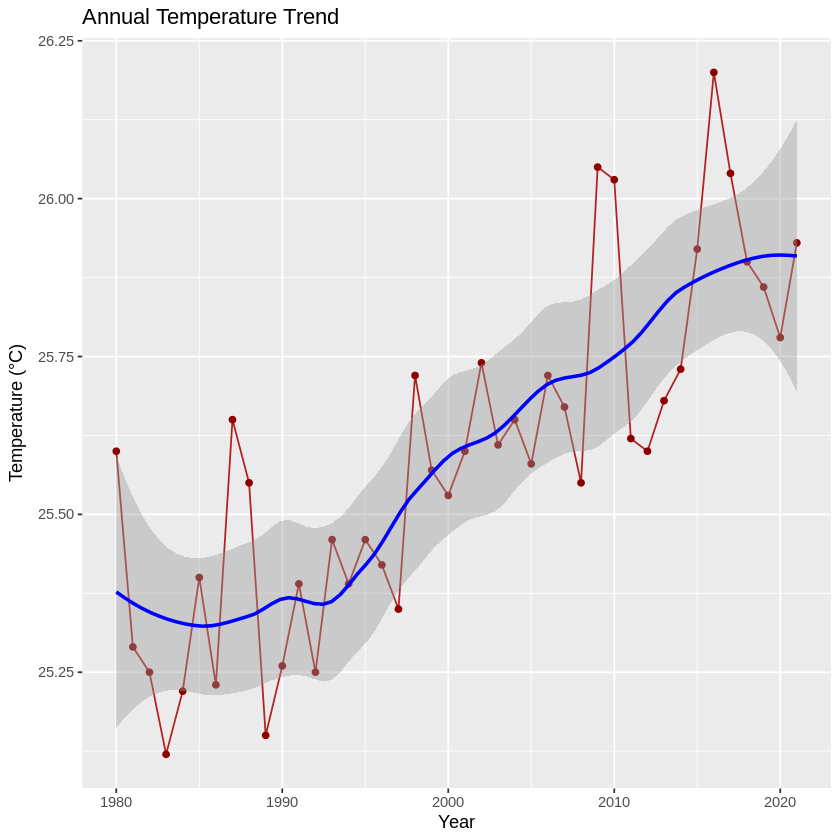

In [ ]:
ggplot(temp_data, aes(x = YEAR, y = ANNUAL)) +
  geom_line(color = "firebrick") +
  geom_point(color = "darkred") +
  geom_smooth(method = "loess", span = 0.5, se = TRUE, color = "blue") +
  labs(title = "Annual Temperature Trend", x = "Year", y = "Temperature (°C)")


**Seasonal Temperature Trends**

* Examined temperature for different seasons: Jan–Feb, Mar–May, Jun–Sep, Oct–Dec.
* Seasonal plots show that some seasons (e.g., summer months) have higher variability, while winters are comparatively stable.
* Insight: Seasonal differences may affect energy demand patterns and natural events.

`geom_smooth()` using formula = 'y ~ x'


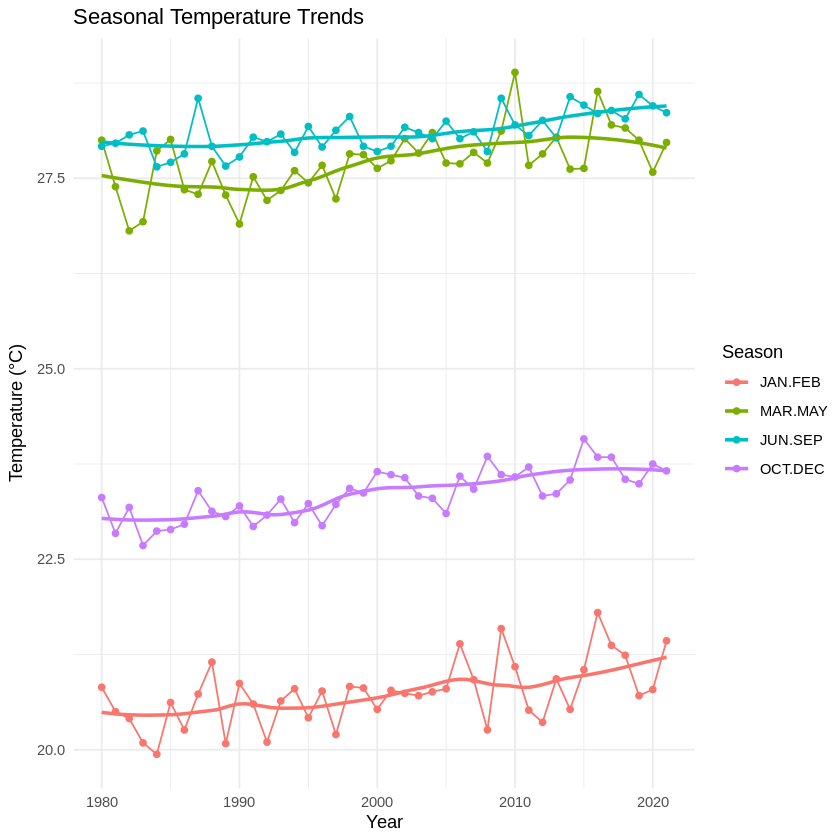

In [ ]:
# Melt to long format for seasons
temp_long <- melt(temp_data, id.vars = "YEAR",
                  measure.vars = c("JAN.FEB","MAR.MAY","JUN.SEP","OCT.DEC"),
                  variable.name = "Season", value.name = "Temp")

ggplot(temp_long, aes(x = YEAR, y = Temp, color = Season)) +
  geom_line() +
  geom_point() +
  geom_smooth(method = "loess", span = 0.5, se = FALSE) +
  labs(title = "Seasonal Temperature Trends", x = "Year", y = "Temperature (°C)") +
  theme_minimal()


**Distribution of Seasonal Temperatures**
* Used histograms and density plots to visualize seasonal temperature spreads.
* Shows that summer months (Jun–Sep) have a wider temperature range, while winter months (Jan–Feb) are more concentrated.
* Insight: High variability seasons may correspond to extreme weather events.

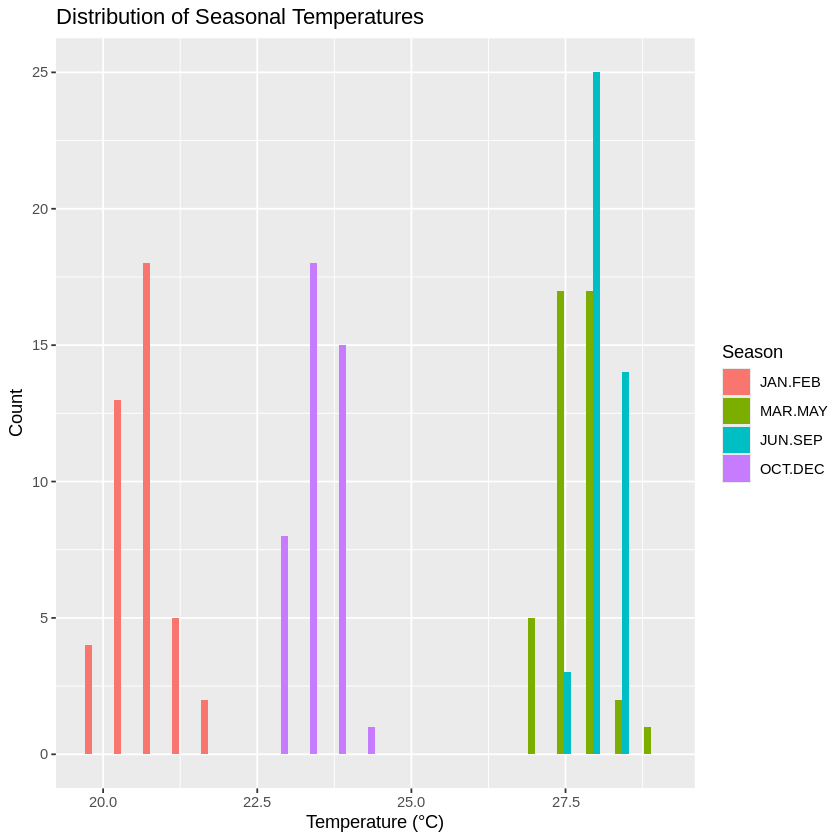

In [ ]:
ggplot(temp_long, aes(x = Temp, fill = Season)) +
  geom_histogram(position = "dodge", bins = 20) +
  labs(title = "Distribution of Seasonal Temperatures", x = "Temperature (°C)", y = "Count")


**Year-to-Year Change in Annual Temperature**
* Calculated the difference between consecutive years.
* Bar plot highlights years with unusually high or low changes.
* Insight: Some years experienced sharp increases, likely due to climate phenomena like El Niño.

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


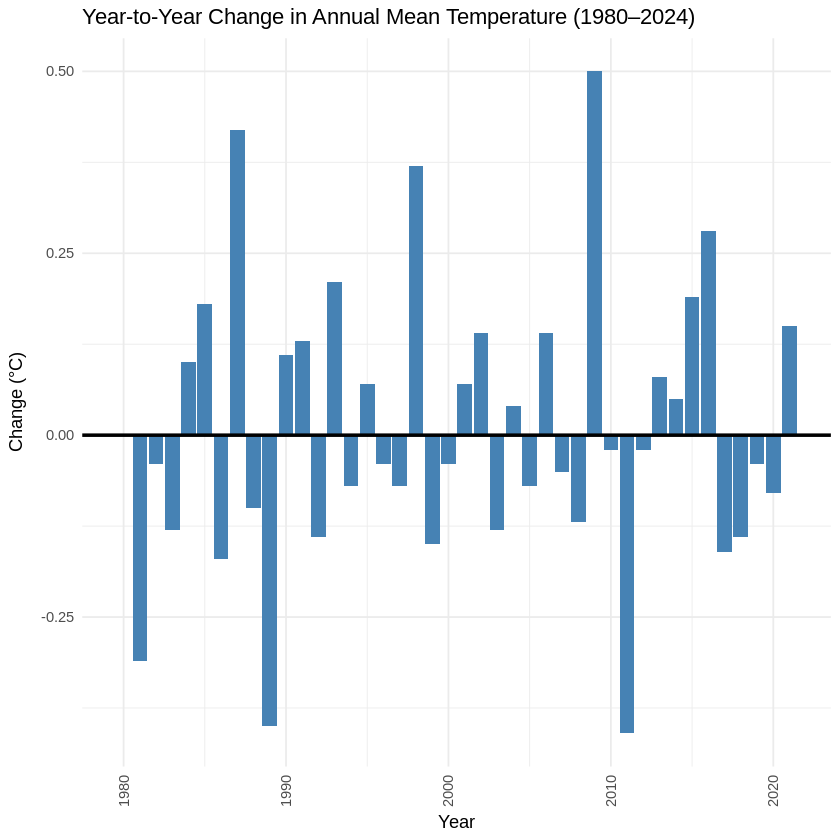

In [ ]:
library(dplyr)
library(ggplot2)

# Load cleaned temperature data
temp_data <- read.csv("temp_cleaned.csv")

# Ensure ANNUAL is numeric
temp_data$ANNUAL <- as.numeric(temp_data$ANNUAL)

# Filter for years >= 1980 (optional)
temp_data <- temp_data %>% filter(YEAR >= 1980)

# Sort by YEAR
temp_data <- temp_data %>% arrange(YEAR)

# Calculate year-to-year change
temp_data <- temp_data %>%
  mutate(AnnualChange = ANNUAL - lag(ANNUAL))

# Plot bar chart
ggplot(temp_data, aes(x = YEAR, y = AnnualChange)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_hline(yintercept = 0, color = "black", linewidth = 1) +
  labs(title = "Year-to-Year Change in Annual Mean Temperature (1980–2024)",
       x = "Year", y = "Change (°C)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


**5-Year Rolling Average**
* Smoothed annual temperatures using a 5-year rolling mean.
* Helps reduce noise from natural variability and highlights the long-term warming trend.
* Insight: Rolling average confirms a consistent upward trend in temperatures over the past four decades

In [ ]:
install.packages("zoo")  # install once

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message in element_line(alpha = 0.3):
“`...` must be empty.
✖ Problematic argument:
• alpha = 0.3”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_line()`).”


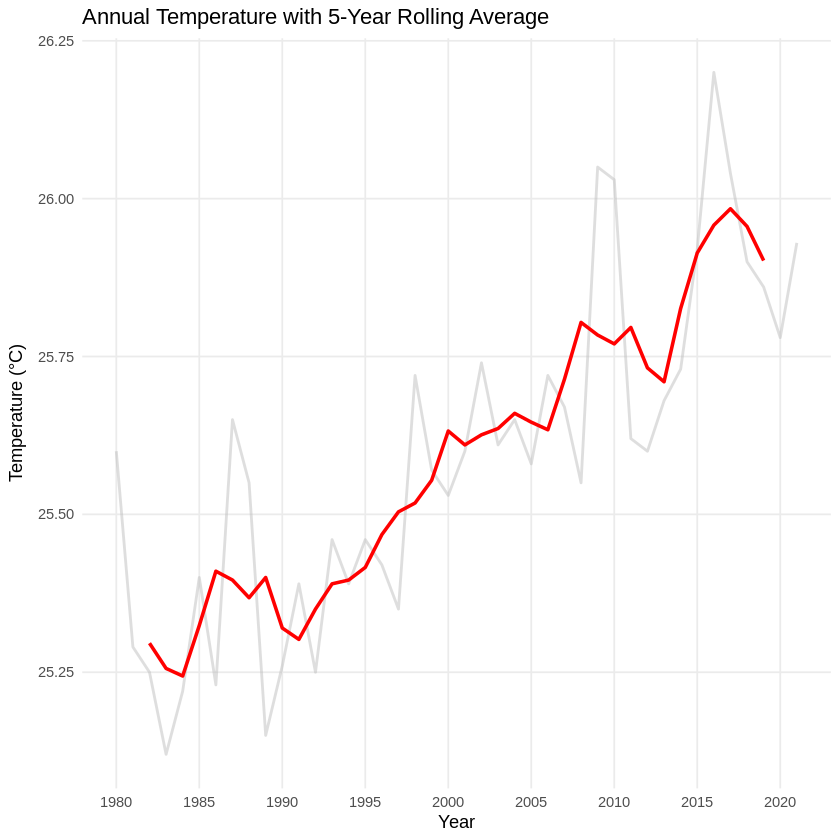

In [ ]:
library(dplyr)
library(ggplot2)
library(zoo)  # for rollmean

# Load cleaned temperature data
temp_data <- read.csv("temp_cleaned.csv")

# Ensure ANNUAL is numeric
temp_data$ANNUAL <- as.numeric(temp_data$ANNUAL)

# Sort by YEAR
temp_data <- temp_data %>% arrange(YEAR)

# Calculate 5-year rolling average (centered)
temp_data$Rolling_5yr <- rollmean(temp_data$ANNUAL, k = 5, fill = NA, align = "center")

# Plot
ggplot(temp_data, aes(x = YEAR)) +
  geom_line(aes(y = ANNUAL), color = "grey", alpha = 0.5, size = 0.8) +
  geom_line(aes(y = Rolling_5yr), color = "red", size = 1) +
  labs(title = "Annual Temperature with 5-Year Rolling Average",
       x = "Year", y = "Temperature (°C)") +
  theme_minimal() +
  theme(panel.grid.major = element_line(alpha = 0.3),
        panel.grid.minor = element_blank()) +
  scale_x_continuous(breaks = seq(min(temp_data$YEAR), max(temp_data$YEAR), by = 5))


**Annual Temperature Distribution by Decade**
* Grouped years by decade and plotted boxplots.
* Insight: Recent decades (2010s–2020s) show higher median temperatures and slightly more spread, indicating warming and variability over time.

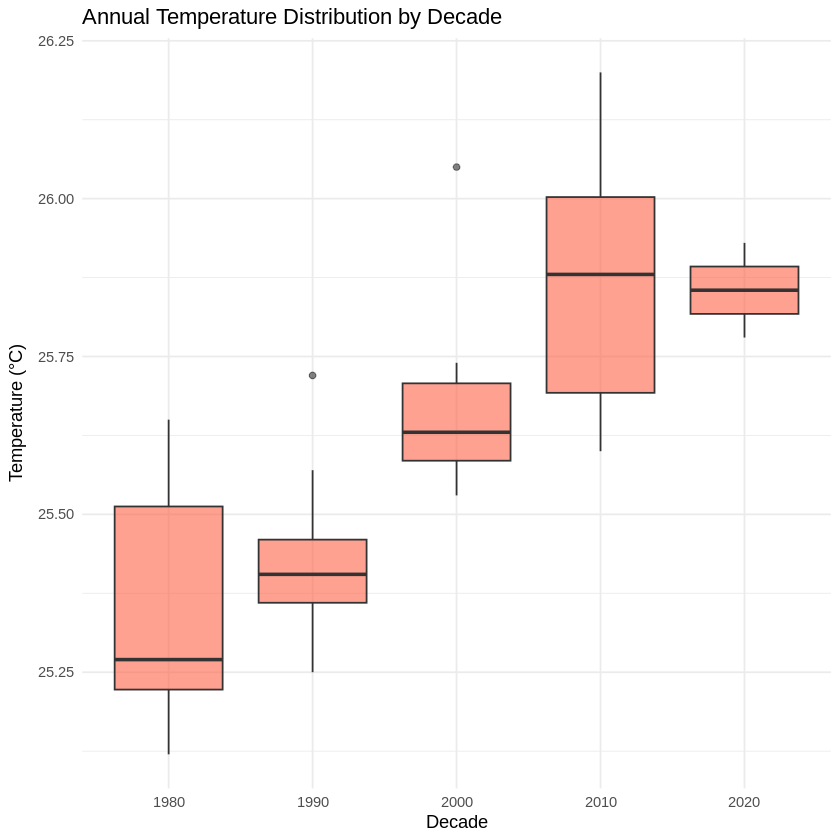

In [ ]:
temp_data$Decade <- (temp_data$YEAR %/% 10) * 10

ggplot(temp_data, aes(x = as.factor(Decade), y = ANNUAL)) +
  geom_boxplot(fill = "tomato", alpha = 0.6) +
  labs(title = "Annual Temperature Distribution by Decade", x = "Decade", y = "Temperature (°C)") +
  theme_minimal()


**Hottest Years**
* Identified years with the highest annual mean temperatures.
* Insight: These years can be used as reference points for studying impacts on ecosystems, agriculture, and energy demand.

In [ ]:
temp_data %>%
  filter(ANNUAL == max(ANNUAL) | ANNUAL == min(ANNUAL))

temp_data %>%
  mutate(Change = ANNUAL - lag(ANNUAL)) %>%
  arrange(desc(abs(Change))) %>%
  head(5)  # 5 years with largest change


YEAR,ANNUAL,JAN.FEB,MAR.MAY,JUN.SEP,OCT.DEC,Rolling_5yr,Decade
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1983,25.12,20.09,26.93,28.12,22.68,25.256,1980
2016,26.20,21.80,28.64,28.35,23.84,25.958,2010


,YEAR,ANNUAL,JAN.FEB,MAR.MAY,JUN.SEP,OCT.DEC,Rolling_5yr,Decade,Change
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2009,26.05,21.59,28.12,28.55,23.61,25.784,2000,0.50
2,1987,25.65,20.73,27.29,28.55,23.40,25.396,1980,0.42
3,2011,25.62,20.52,27.67,28.06,23.71,25.796,2010,-0.41
4,1989,25.15,20.08,27.28,27.66,23.06,25.400,1980,-0.40
5,1998,25.72,20.83,27.82,28.31,23.43,25.518,1990,0.37


**Linear Regression**
* Fitted a linear model on annual temperatures to quantify the overall warming trend.
* Insight: The slope of the regression line confirms that temperature is increasing over time, reinforcing the findings from rolling averages and seasonal analysis.

`geom_smooth()` using formula = 'y ~ x'


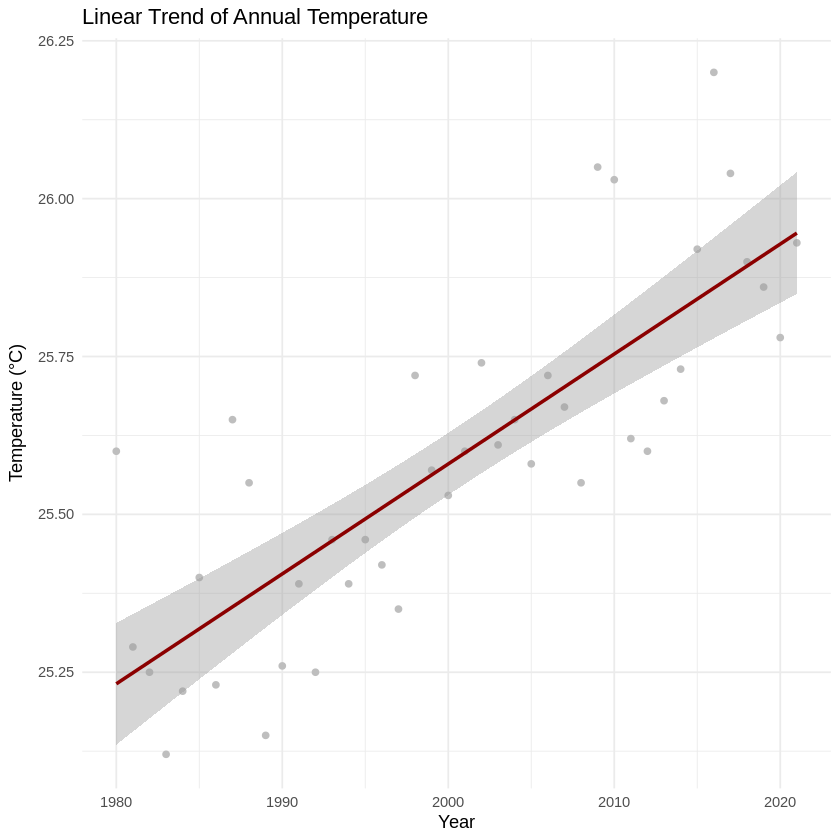

In [ ]:
ggplot(temp_data, aes(x = YEAR, y = ANNUAL)) +
  geom_point(color = "grey") +
  geom_smooth(method = "lm", color = "darkred") +
  labs(title = "Linear Trend of Annual Temperature", x = "Year", y = "Temperature (°C)") +
  theme_minimal()


#Exploratory Data Analysis of Energy Generation (Annual)

In [ ]:
energy_data <- read.csv("energy_cleaned_yearly_wide.csv", stringsAsFactors = FALSE, check.names = FALSE)

# Remove empty or placeholder rows (like the first row with "")
energy_data <- energy_data %>% filter(Parameter != "" & Parameter != "0")

# Reshape wide → long
energy_long <- energy_data %>%
  pivot_longer(
    cols = -Parameter,
    names_to = "Year",
    values_to = "Generation"
  )

# Convert Year to numeric and Generation to numeric
energy_long$Year <- as.numeric(energy_long$Year)
energy_long$Generation <- as.numeric(energy_long$Generation)


In [ ]:
summary(energy_long)

# Total generation per source across all years
energy_long %>% group_by(Parameter) %>% summarise(Total = sum(Generation))


  Parameter              Year        Generation     
 Length:90          Min.   :2015   Min.   :   5111  
 Class :character   1st Qu.:2017   1st Qu.:  22396  
 Mode  :character   Median :2020   Median :  51214  
                    Mean   :2020   Mean   : 311471  
                    3rd Qu.:2022   3rd Qu.: 152006  
                    Max.   :2024   Max.   :1803390  

Parameter,Total
<chr>,<dbl>
Bio Power - Generation (in MU),157718.58
Coal - Generation (in MU),10342857.16
Hydro - Generation (in MU),1383945.87
Nuclear - Generation (in MU),424946.19
Oil & Gas - Generation (in MU),413377.22
Small-Hydro - Generation (in MU),93511.73
Solar - Generation (in MU),589537.35
Total,14016179.26
Wind - Generation (in MU),610285.16


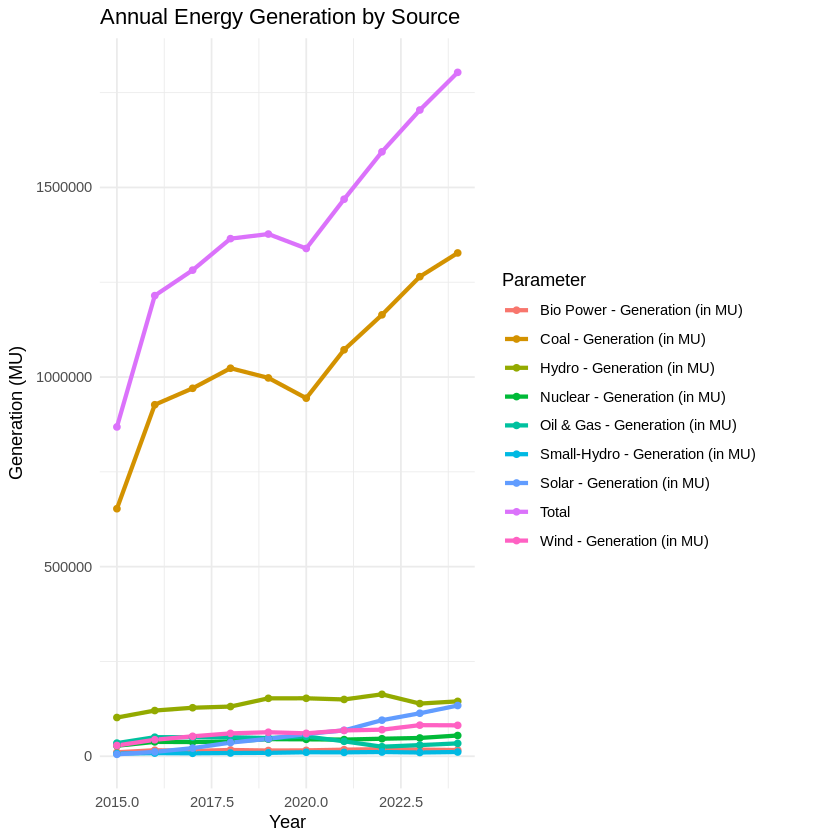

In [ ]:
ggplot(energy_long, aes(x = Year, y = Generation, color = Parameter)) +
  geom_line(linewidth = 1.2) +
  geom_point() +
  labs(title = "Annual Energy Generation by Source",
       x = "Year", y = "Generation (MU)") +
  theme_minimal()


Warning message:
“Removed 9 rows containing missing values or values outside the scale range
(`geom_bar()`).”


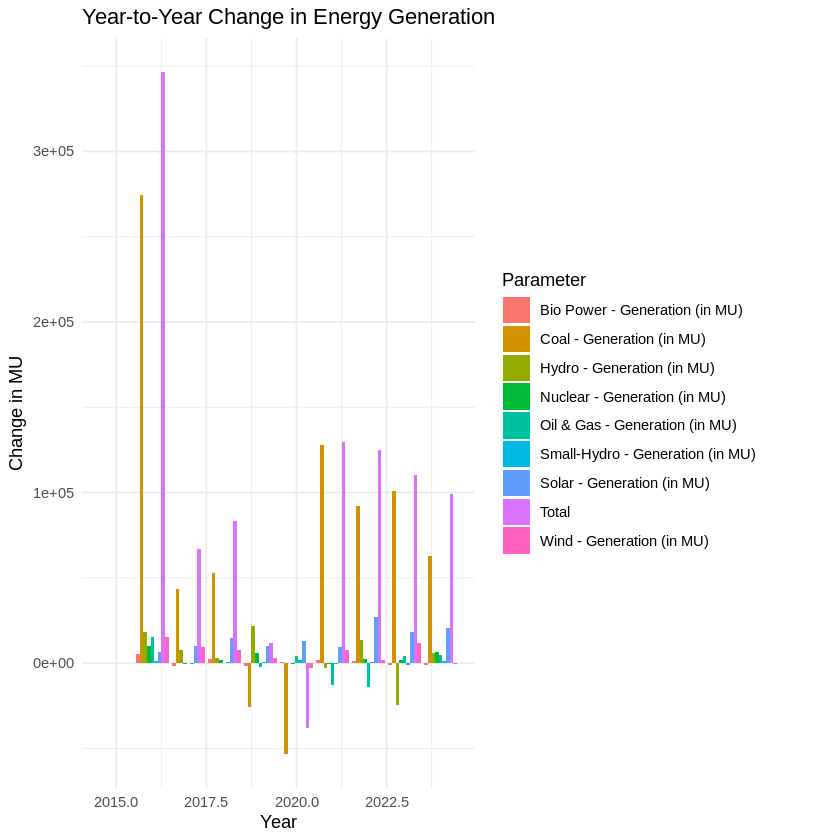

In [ ]:
energy_long <- energy_long %>%
  group_by(Parameter) %>%
  arrange(Year) %>%
  mutate(YearlyChange = Generation - lag(Generation))

ggplot(energy_long, aes(x = Year, y = YearlyChange, fill = Parameter)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Year-to-Year Change in Energy Generation",
       y = "Change in MU", x = "Year") +
  theme_minimal()


Warning message:
“Removed 18 rows containing missing values or values outside the scale range
(`geom_line()`).”


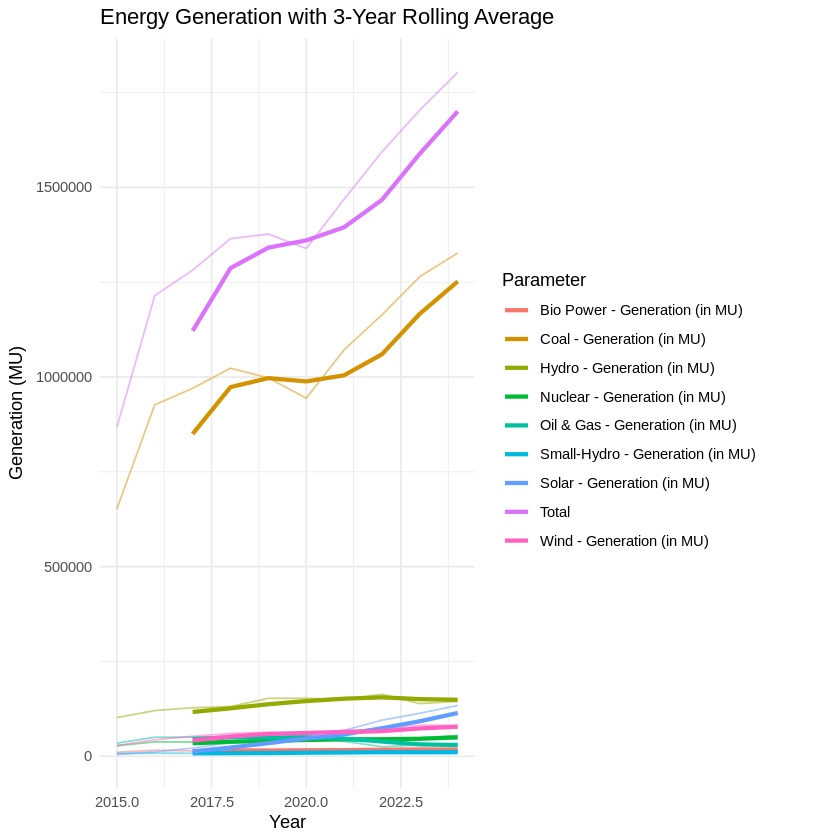

In [ ]:
energy_long <- energy_long %>%
  group_by(Parameter) %>%
  arrange(Year) %>%
  mutate(Rolling3yr = zoo::rollmean(Generation, k = 3, fill = NA, align = "right"))

ggplot(energy_long, aes(x = Year)) +
  geom_line(aes(y = Generation, color = Parameter), alpha = 0.5) +
  geom_line(aes(y = Rolling3yr, color = Parameter), linewidth = 1.2) +
  labs(title = "Energy Generation with 3-Year Rolling Average",
       y = "Generation (MU)", x = "Year") +
  theme_minimal()


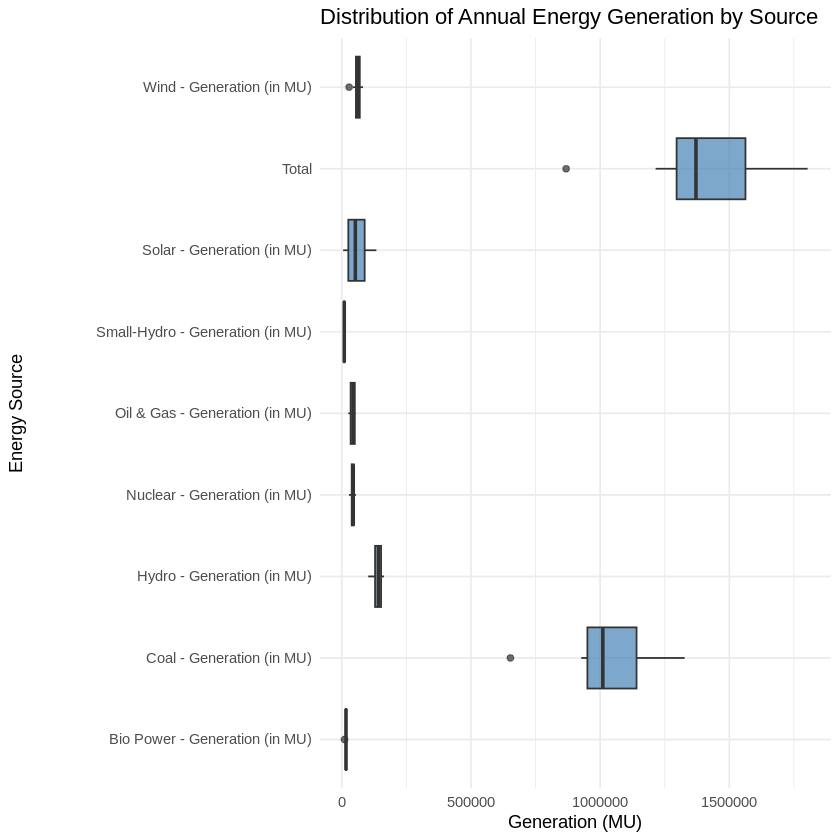

In [ ]:
ggplot(energy_long, aes(x = Parameter, y = Generation)) +
  geom_boxplot(fill = "steelblue", alpha = 0.7) +
  labs(title = "Distribution of Annual Energy Generation by Source",
       x = "Energy Source", y = "Generation (MU)") +
  theme_minimal() +
  coord_flip()


In [ ]:
energy_long %>%
  group_by(Parameter) %>%
  top_n(3, Generation) %>%
  arrange(Parameter, desc(Generation))


Parameter,Year,Generation,YearlyChange,Rolling3yr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Bio Power - Generation (in MU),2022,18852.72,1525.74,17231.263
Bio Power - Generation (in MU),2023,17603.55,-1249.17,17927.750
Bio Power - Generation (in MU),2021,17326.98,1812.89,15988.730
Coal - Generation (in MU),2024,1327203.42,62516.60,1251982.247
Coal - Generation (in MU),2023,1264686.82,100630.32,1166870.593
Coal - Generation (in MU),2022,1164056.50,92188.04,1060044.777
Hydro - Generation (in MU),2022,163344.77,13577.26,155316.013
Hydro - Generation (in MU),2020,152835.76,83.84,145535.923
Hydro - Generation (in MU),2019,152751.92,21731.83,137233.530


`geom_smooth()` using formula = 'y ~ x'


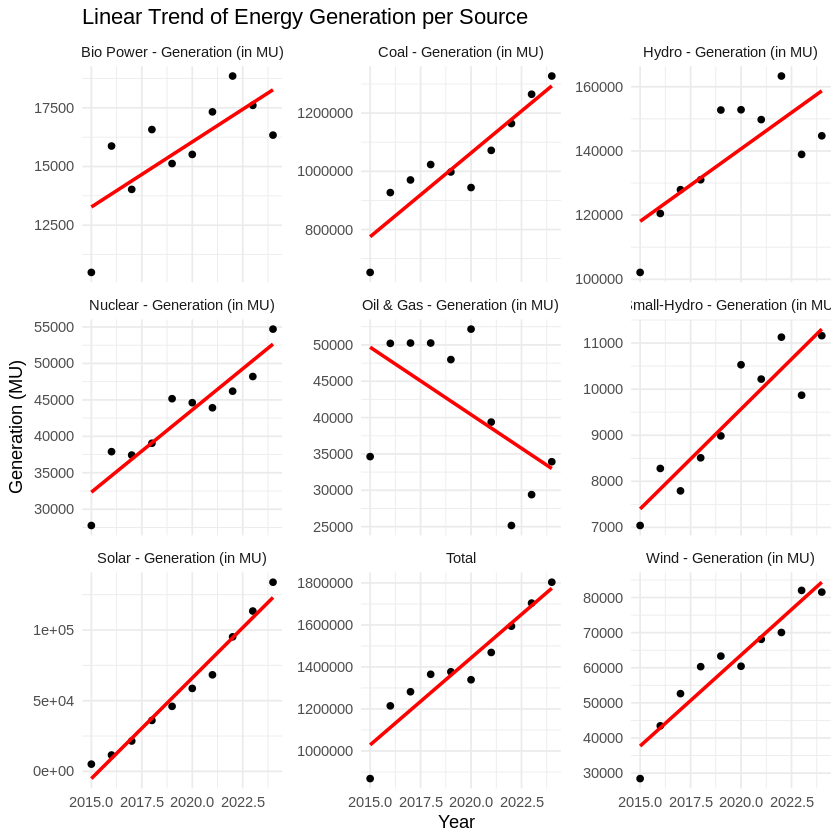

In [ ]:
ggplot(energy_long, aes(x = Year, y = Generation)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  facet_wrap(~ Parameter, scales = "free_y") +
  labs(title = "Linear Trend of Energy Generation per Source",
       x = "Year", y = "Generation (MU)") +
  theme_minimal()


#Relationship between temperature and Energy consumption

In [ ]:
# Replace with your actual file name
temp_cleaned <- read.csv("temp_cleaned.csv", stringsAsFactors = FALSE)

# Ensure Year column is numeric
temp_cleaned$Year <- as.numeric(temp_cleaned$YEAR)  # or rename YEAR column if different

# Optional: check the first rows
head(temp_cleaned)


,YEAR,ANNUAL,JAN.FEB,MAR.MAY,JUN.SEP,OCT.DEC,Year
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1980,25.60,20.82,28.00,27.92,23.31,1980
2,1981,25.29,20.50,27.39,27.96,22.84,1981
3,1982,25.25,20.41,26.81,28.07,23.18,1982
4,1983,25.12,20.09,26.93,28.12,22.68,1983
5,1984,25.22,19.94,27.86,27.65,22.87,1984
6,1985,25.40,20.62,28.01,27.71,22.89,1985


In [ ]:
library(dplyr)
library(tidyr)

# Remove empty or 'Total' rows
annual_energy <- annual_energy[!annual_energy$Parameter %in% c("", "Total"), ]

# Reshape wide -> long
energy_long <- annual_energy %>%
  pivot_longer(
    cols = starts_with("X"),
    names_to = "Year",
    values_to = "Generation"
  )

# Remove 'X' and convert Year & Generation to numeric
energy_long$Year <- as.numeric(sub("X", "", energy_long$Year))
energy_long$Generation <- as.numeric(energy_long$Generation)

# Optional: sum per Year if needed
energy_yearly <- energy_long %>%
  group_by(Year) %>%
  summarise(TotalGeneration = sum(Generation, na.rm = TRUE))

# Merge with temperature
combined <- merge(temp_cleaned, energy_yearly, by = "Year", all = FALSE)
head(combined)


,Year,YEAR,ANNUAL,JAN.FEB,MAR.MAY,JUN.SEP,OCT.DEC,TotalGeneration
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2015,2015,25.92,21.05,27.63,28.46,24.08,868356.7
2,2016,2016,26.20,21.80,28.64,28.35,23.84,1214708.2
3,2017,2017,26.04,21.37,28.20,28.39,23.84,1281830.8
4,2018,2018,25.90,21.24,28.16,28.28,23.55,1364980.9
5,2019,2019,25.86,20.71,28.00,28.60,23.49,1376993.6
6,2020,2020,25.78,20.79,27.58,28.45,23.75,1338983.3


In [ ]:
write.csv(combined, "temp_energy_combined.csv", row.names = FALSE)


In [ ]:
summary(combined)
str(combined)


      Year           YEAR          ANNUAL         JAN.FEB         MAR.MAY     
 Min.   :2015   Min.   :2015   Min.   :25.78   Min.   :20.71   Min.   :27.58  
 1st Qu.:2016   1st Qu.:2016   1st Qu.:25.88   1st Qu.:20.92   1st Qu.:27.80  
 Median :2018   Median :2018   Median :25.92   Median :21.24   Median :28.00  
 Mean   :2018   Mean   :2018   Mean   :25.95   Mean   :21.20   Mean   :28.03  
 3rd Qu.:2020   3rd Qu.:2020   3rd Qu.:25.98   3rd Qu.:21.40   3rd Qu.:28.18  
 Max.   :2021   Max.   :2021   Max.   :26.20   Max.   :21.80   Max.   :28.64  
    JUN.SEP         OCT.DEC      TotalGeneration  
 Min.   :28.28   Min.   :23.49   Min.   : 868357  
 1st Qu.:28.36   1st Qu.:23.61   1st Qu.:1248269  
 Median :28.39   Median :23.75   Median :1338983  
 Mean   :28.41   Mean   :23.74   Mean   :1273533  
 3rd Qu.:28.45   3rd Qu.:23.84   3rd Qu.:1370987  
 Max.   :28.60   Max.   :24.08   Max.   :1468879  

'data.frame':	7 obs. of  8 variables:
 $ Year           : num  2015 2016 2017 2018 2019 ...
 $ YEAR           : int  2015 2016 2017 2018 2019 2020 2021
 $ ANNUAL         : num  25.9 26.2 26 25.9 25.9 ...
 $ JAN.FEB        : num  21.1 21.8 21.4 21.2 20.7 ...
 $ MAR.MAY        : num  27.6 28.6 28.2 28.2 28 ...
 $ JUN.SEP        : num  28.5 28.4 28.4 28.3 28.6 ...
 $ OCT.DEC        : num  24.1 23.8 23.8 23.6 23.5 ...
 $ TotalGeneration: num  868357 1214708 1281831 1364981 1376994 ...


corrplot 0.95 loaded



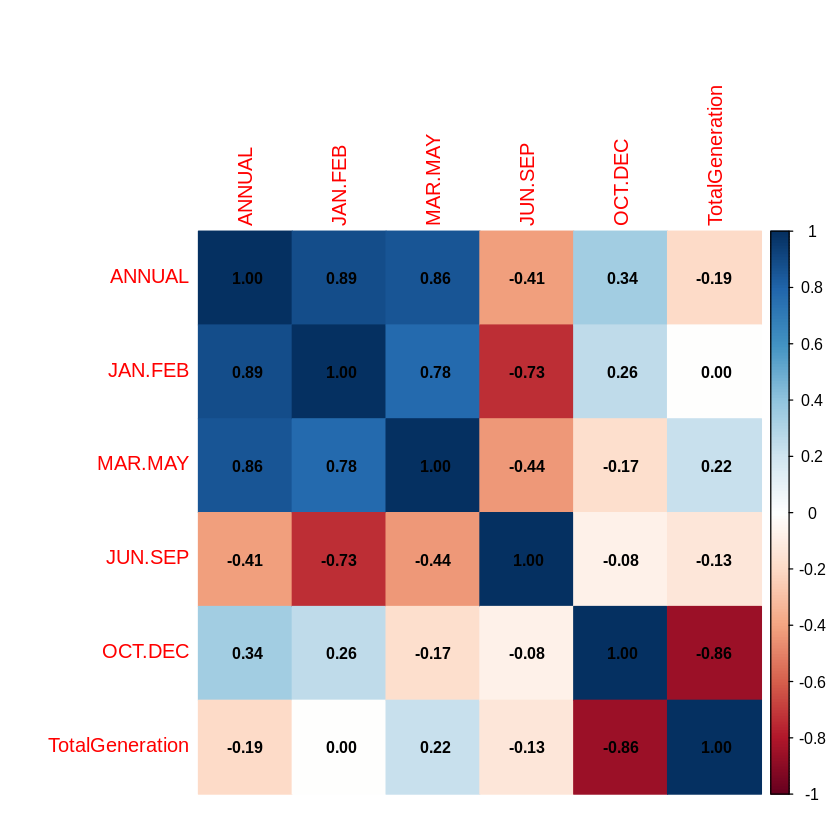

In [ ]:
library(corrplot)

# Select numeric columns for correlation
num_cols <- combined %>% select(ANNUAL, `JAN.FEB`, `MAR.MAY`, `JUN.SEP`, `OCT.DEC`, TotalGeneration)

# Correlation matrix
cor_matrix <- cor(num_cols, use = "complete.obs")
corrplot(cor_matrix, method = "color", addCoef.col = "black", number.cex = 0.8)


`geom_smooth()` using formula = 'y ~ x'


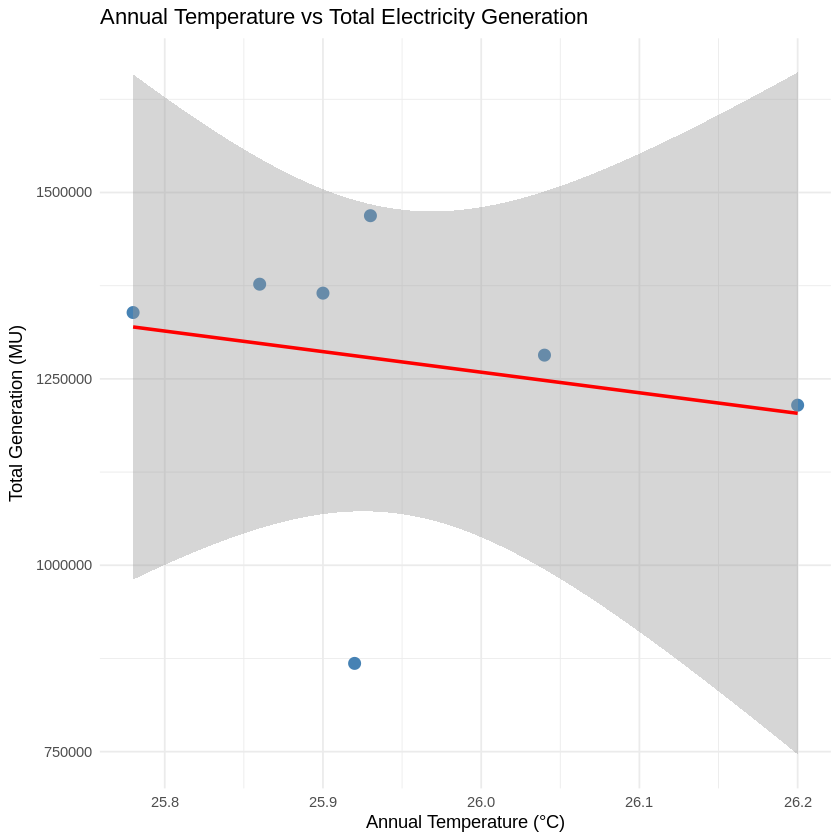

In [ ]:
library(ggplot2)

# Annual temperature vs Total Generation
ggplot(combined, aes(x = ANNUAL, y = TotalGeneration)) +
  geom_point(color = "steelblue", size = 3) +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Annual Temperature vs Total Electricity Generation",
       x = "Annual Temperature (°C)", y = "Total Generation (MU)") +
  theme_minimal()


In [ ]:
lm_model <- lm(TotalGeneration ~ ANNUAL, data = combined)
summary(lm_model)



Call:
lm(formula = TotalGeneration ~ ANNUAL, data = combined)

Residuals:
      1       2       3       4       5       6       7 
-412666   10943   33918   78440   79416   19332  190616 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  8432800   16338424   0.516    0.628
ANNUAL       -275917     629674  -0.438    0.680

Residual standard error: 210100 on 5 degrees of freedom
Multiple R-squared:  0.03698,	Adjusted R-squared:  -0.1556 
F-statistic: 0.192 on 1 and 5 DF,  p-value: 0.6795


In [ ]:
lm_model2 <- lm(TotalGeneration ~ `JAN.FEB` + `MAR.MAY` + `JUN.SEP` + `OCT.DEC`, data = combined)
summary(lm_model2)



Call:
lm(formula = TotalGeneration ~ JAN.FEB + MAR.MAY + JUN.SEP + 
    OCT.DEC, data = combined)

Residuals:
     1      2      3      4      5      6      7 
-95184  -4234 103271 -66063 -33636 101838  -5993 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 19194597   26415017   0.727    0.543
JAN.FEB       446876     467952   0.955    0.440
MAR.MAY      -317350     365362  -0.869    0.477
JUN.SEP       303487     947204   0.320    0.779
OCT.DEC     -1142302     411835  -2.774    0.109

Residual standard error: 133500 on 2 degrees of freedom
Multiple R-squared:  0.8445,	Adjusted R-squared:  0.5335 
F-statistic: 2.715 on 4 and 2 DF,  p-value: 0.2868


#Prediction of temperature

In [ ]:
# Fit linear model
lm_temp <- lm(ANNUAL ~ Year, data = temp_cleaned)
summary(lm_temp)

# Predict for future years
future_years <- data.frame(Year = 2025:2030)
future_temp <- predict(lm_temp, newdata = future_years)

# Combine results
pred_df <- cbind(future_years, PredictedTemp = future_temp)
print(pred_df)



Call:
lm(formula = ANNUAL ~ Year, data = temp_cleaned)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23833 -0.10298 -0.02692  0.06946  0.36837 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.243893   4.011803  -2.304   0.0265 *  
Year         0.017412   0.002005   8.683 9.62e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1575 on 40 degrees of freedom
Multiple R-squared:  0.6533,	Adjusted R-squared:  0.6447 
F-statistic: 75.39 on 1 and 40 DF,  p-value: 9.621e-11


  Year PredictedTemp
1 2025      26.01516
2 2026      26.03257
3 2027      26.04999
4 2028      26.06740
5 2029      26.08481
6 2030      26.10222


In [ ]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’




Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




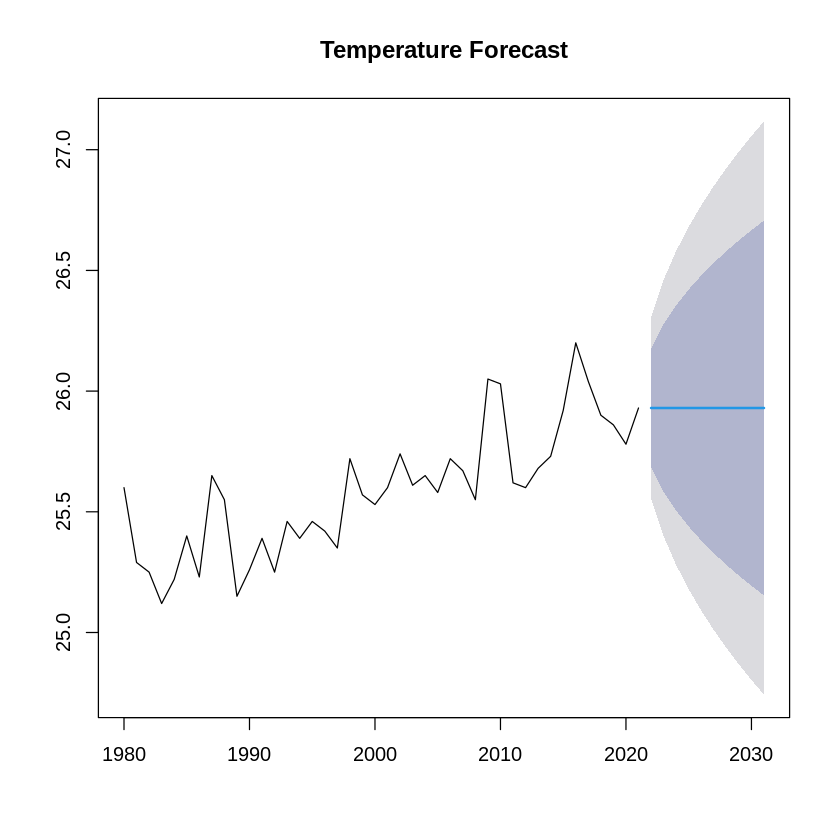

In [ ]:
library(forecast)
library(zoo)

# Convert to time series
temp_ts <- ts(temp_cleaned$ANNUAL, start = min(temp_cleaned$Year), frequency = 1) # yearly data

# Fit ARIMA model
arima_model <- auto.arima(temp_ts)
forecast_temp <- forecast(arima_model, h = 10) # next 10 years

plot(forecast_temp, main = "Temperature Forecast")


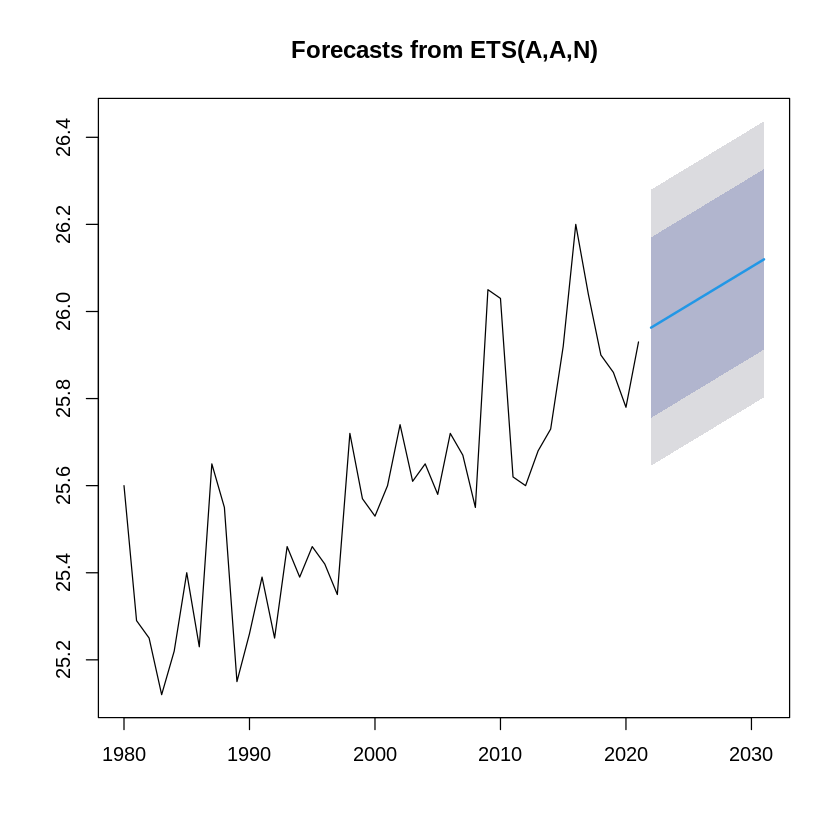

In [ ]:
ets_model <- ets(temp_ts)
forecast_temp <- forecast(ets_model, h = 10)
plot(forecast_temp)


In [ ]:
colnames(temp_cleaned)
colnames(temp_cleaned)[colnames(temp_cleaned) == "YEAR"] <- "Year"
temp_cleaned$ANNUAL <- as.numeric(temp_cleaned$ANNUAL)



[1] "Year"    "ANNUAL"  "JAN.FEB" "MAR.MAY" "JUN.SEP" "OCT.DEC"

In [ ]:
# Make sure your data is numeric and Year is numeric
temp_cleaned$ANNUAL <- as.numeric(temp_cleaned$ANNUAL)
temp_cleaned$Year <- as.numeric(temp_cleaned$YEAR)


In [ ]:
library(forecast)

# Convert to time series
temp_ts <- ts(temp_cleaned$ANNUAL, start = min(temp_cleaned$Year), frequency = 1)

# Fit ARIMA
temp_arima <- auto.arima(temp_ts)
summary(temp_arima)


Series: temp_ts 
ARIMA(0,1,0) 

sigma^2 = 0.03672:  log likelihood = 9.58
AIC=-17.15   AICc=-17.05   BIC=-15.44

Training set error measures:
                      ME      RMSE       MAE        MPE      MAPE      MASE
Training set 0.008466666 0.1893193 0.1465619 0.03014758 0.5723033 0.9802672
                  ACF1
Training set -0.204568

In [ ]:
n_years <- 15
temp_forecast <- forecast(temp_arima, h = n_years)
temp_forecast


     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2022          25.93 25.68444 26.17556 25.55444 26.30556
2023          25.93 25.58272 26.27728 25.39888 26.46112
2024          25.93 25.50467 26.35533 25.27952 26.58048
2025          25.93 25.43887 26.42113 25.17889 26.68111
2026          25.93 25.38090 26.47910 25.09023 26.76977
2027          25.93 25.32849 26.53151 25.01008 26.84992
2028          25.93 25.28030 26.57970 24.93637 26.92363
2029          25.93 25.23544 26.62456 24.86776 26.99224
2030          25.93 25.19331 26.66669 24.80333 27.05667
2031          25.93 25.15346 26.70654 24.74238 27.11762
2032          25.93 25.11556 26.74444 24.68442 27.17558
2033          25.93 25.07934 26.78066 24.62903 27.23097
2034          25.93 25.04461 26.81539 24.57591 27.28409
2035          25.93 25.01119 26.84881 24.52479 27.33521
2036          25.93 24.97894 26.88106 24.47547 27.38453

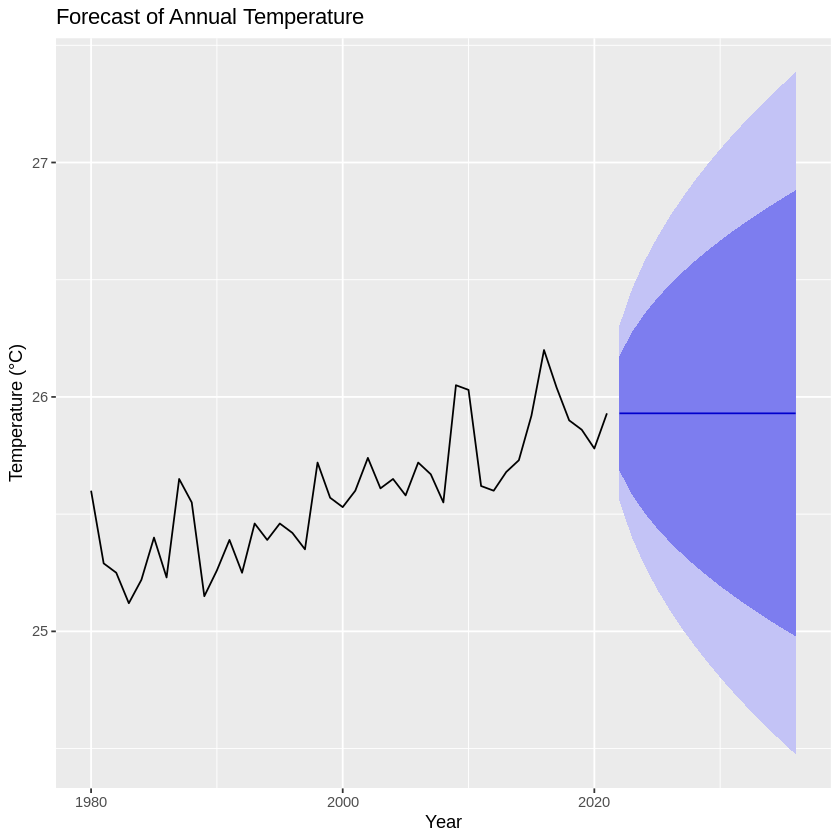

In [ ]:
autoplot(temp_forecast) +
  ggtitle("Forecast of Annual Temperature") +
  ylab("Temperature (°C)") +
  xlab("Year")
